In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

In [2]:
mp = pd.read_csv('~/Desktop/To_prediction/ESCO_all_pheno_MGX.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,s__43-108_sp001915545:1,s__Absiella_dolichum:1,s__Absiella_innocuum:1,s__Absiella_sp000163515:1,s__Absiella_sp000165065:1,s__Acetatifactor_sp003447295:1,s__Acetatifactor_sp900066365:1,s__Acetatifactor_sp900066365:2,s__Acetatifactor_sp900066565:1,s__Acidaminococcus_intestini:1,...,s__esco_HumanRef_tmp_v1.0.1_961,s__esco_HumanRef_tmp_v1.0.1_966,s__esco_HumanRef_tmp_v1.0.1_968,s__esco_HumanRef_tmp_v1.0.1_973,s__esco_HumanRef_tmp_v1.0.1_983,s__esco_HumanRef_tmp_v1.0.1_989,s__esco_HumanRef_tmp_v1.0.1_990,s__esco_HumanRef_tmp_v1.0.1_998,s__esco_HumanRef_tmp_v1.0.1_999,Diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM5MCVL,0.023,0.000,0.000,0.002,0.000,0.001,0.000,0.002,0.001,0.145,...,0.000,0.000,0.000,0.003,0.000,0.001,0.000,0.002,0.0,CD
CSM5MCVN,0.018,0.000,0.001,0.002,0.000,0.000,0.000,0.002,0.001,3.072,...,0.000,0.000,0.000,0.002,0.000,0.001,0.000,0.002,0.0,CD
CSM5MCW6,0.034,0.000,0.010,0.006,0.000,0.001,0.001,0.003,0.004,0.001,...,0.001,0.001,0.002,0.005,0.000,0.000,0.000,0.000,0.0,CD
CSM5MCWC,0.026,0.004,0.454,0.004,0.012,0.019,0.000,0.130,0.040,0.000,...,0.000,0.000,0.003,0.000,0.000,0.019,0.000,0.000,0.0,CD
CSM5MCWE,0.000,0.002,0.304,0.002,0.008,0.021,0.000,0.057,0.018,0.000,...,0.001,0.000,0.002,0.000,0.000,0.015,0.001,0.000,0.0,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSMA265D,0.006,0.005,0.048,0.031,0.003,0.018,0.000,0.025,0.038,0.001,...,0.000,0.000,0.006,0.000,0.001,0.007,0.003,0.000,0.0,Control
PSMA265F,0.012,0.005,0.073,0.561,0.003,0.005,0.000,0.037,0.022,0.000,...,0.000,0.000,0.010,0.000,0.002,0.012,0.005,0.000,0.0,Control
PSMA265H,0.006,0.018,0.094,0.573,0.002,0.010,0.001,0.024,0.025,0.001,...,0.000,0.000,0.006,0.000,0.001,0.010,0.003,0.000,0.0,Control


In [40]:
mp = pd.read_csv('~/Downloads/ESCO_all_pheno__.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp = mp.replace(np.NAN, 0)

In [3]:
for column in mp.columns:
    # print(column)
    sns.scatterplot(data=mp[column])
    plt.show()


KeyboardInterrupt



In [1]:
for i in mp.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(mp[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(mp[i], ax=ax_hist , bins = 10,kde=True)

NameError: name 'mp' is not defined

In [41]:
select_sampels = pd.read_csv('~/Desktop/selected_samples_MGX.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)
select_sampels

,fecalcal_max,Diagnosis
External ID,,
CSM67UA2,37.17836,CD
CSM5MCVN,16.32450,CD
CSM67UBZ,14.30000,UC
CSM5MCXL,70.91411,UC
CSM5MCY8,232.60620,UC
...,...,...
PSM7J19N,16.78459,nonIBD
PSM6XBW3,79.82248,nonIBD
PSM7J12J,289.22620,CD


In [42]:
mp = mp.loc[select_sampels.index,:]
mp = mp.loc[:,mp.columns.str.startswith('s__')]
mp["diagnosis"] = select_sampels.iloc[:,-1]
mp

,s__43-108_sp001915545:1,s__Absiella_dolichum:1,s__Absiella_innocuum:1,s__Absiella_sp000163515:1,s__Absiella_sp000165065:1,s__Acetatifactor_sp003447295:1,s__Acetatifactor_sp900066365:1,s__Acetatifactor_sp900066365:2,s__Acetatifactor_sp900066565:1,s__Acidaminococcus_intestini:1,...,s__esco_HumanRef_tmp_v1.0.1_961,s__esco_HumanRef_tmp_v1.0.1_966,s__esco_HumanRef_tmp_v1.0.1_968,s__esco_HumanRef_tmp_v1.0.1_973,s__esco_HumanRef_tmp_v1.0.1_983,s__esco_HumanRef_tmp_v1.0.1_989,s__esco_HumanRef_tmp_v1.0.1_990,s__esco_HumanRef_tmp_v1.0.1_998,s__esco_HumanRef_tmp_v1.0.1_999,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,3.963316,6.907755,6.214608,4.422849,0.000000,4.422849,0.000000,6.214608,5.809143,0.000000,...,0.000000,0.000000,6.214608,6.214608,0.000000,0.000000,0.000000,6.214608,0.00000,CD
CSM5MCVN,4.017384,0.000000,6.907755,6.214608,0.000000,0.000000,0.000000,6.214608,6.907755,-1.122329,...,0.000000,0.000000,0.000000,6.214608,0.000000,6.907755,0.000000,6.214608,0.00000,CD
CSM67UBZ,3.506558,6.907755,5.809143,3.772261,6.907755,6.907755,0.000000,4.199705,6.214608,0.959720,...,0.000000,6.907755,0.000000,6.214608,6.907755,5.809143,6.907755,0.000000,0.00001,UC
CSM5MCXL,2.688248,6.214608,6.214608,6.907755,6.907755,6.907755,5.809143,6.214608,5.521461,6.907755,...,0.000000,0.000000,6.907755,6.214608,0.000000,6.907755,0.000000,6.214608,0.00000,UC
CSM5MCY8,3.123566,6.907755,5.521461,3.816713,0.000000,6.214608,0.000000,5.809143,3.729701,4.710531,...,0.000000,4.605170,6.214608,5.809143,0.000000,3.611918,5.809143,6.907755,0.00002,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,4.961845,6.907755,6.214608,4.961845,6.907755,3.123566,2.918771,0.757153,0.219401,5.809143,...,0.000000,6.907755,6.214608,6.907755,0.000000,6.907755,6.907755,6.907755,0.00001,nonIBD
PSM6XBW3,6.907755,6.907755,-1.428635,5.115996,3.194183,6.907755,0.000000,0.000000,6.214608,5.115996,...,6.214608,6.907755,4.422849,0.000000,6.907755,3.540459,6.907755,0.000000,0.00001,nonIBD
PSM7J12J,5.521461,0.000000,2.263364,0.000000,5.298317,6.907755,0.000000,0.000000,6.907755,0.000000,...,0.000000,0.000000,0.000000,6.214608,0.000000,6.907755,0.000000,0.000000,0.00000,CD


In [45]:
MTX_X = mp.iloc[:,1:1398]
MTX_y = mp.iloc[:,-1]

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.40, random_state=42)

Best Model:
RandomForestClassifier(max_features=32, min_samples_split=5, n_estimators=50,
                       random_state=42)


<AxesSubplot:>

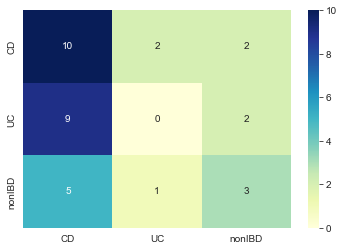

In [50]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=42)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [51]:
from sklearn import metrics
print(f'Accuracy {round(metrics.accuracy_score(y_test, RF_predictions)*100,2)}%')

Accuracy 38.24%
